<img><src>![image-2.png](attachment:image-2.png)</src></img>

<b>Definition of data sate: </b>Diabetes is a chronic health condition that affects how your body turns food into energy. There are three main types of diabetes: type 1, type 2, and gestational diabetes.
<hr><b>Goals: </b>we create model classifay human of health  and predict the state of human diabetes by used ML
<hr>
<h4>df1:</h4>
diabetes_binary_health_indicators_BRFSS2021.csv is a clean dataset of 236,378 survey responses to the CDC's BRFSS2021. The target variable Diabetes_binary has 2 classes. 0 is for no diabetes, and 1 is for prediabetes or diabetes. This dataset has 21 feature variables and is not balanced.

<h4>df2:</h4>
diabetes_binary_5050split_health_indicators_BRFSS2021 is a clean dataset of 67,136 survey responses to the CDC's BRFSS2021. It has an equal 50-50 split of respondents with no diabetes and with either prediabetes or diabetes. The target variable Diabetes_binary has 2 classes. 0 is for no diabetes, and 1 is for prediabetes or diabetes. This dataset has 21 feature variables and is balanced.

<h4>df3:</h4>
diabetes_012_health_indicators_BRFSS2021 is a clean dataset of 236,378 survey responses to the CDC's BRFSS2021. The target variable Diabetes_binary has 2 classes. 0 is for no diabetes, and 1 is for prediabetes or diabetes. This dataset has 21 feature variables and is not balanced.
    

<!-- # Import library -->
<h1 align=center  style=background-color:DodgerBlue> Import library</h1>

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import KFold , cross_val_score


from sklearn. linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier



In [2]:
df1=pd.read_csv("/content/sample_data/diabetes_binary_health_indicators_BRFSS2021.csv")
df2=pd.read_csv("/content/sample_data/diabetes_binary_5050split_health_indicators_BRFSS2021.csv")
df3=pd.read_csv("/content/sample_data/diabetes_012_health_indicators_BRFSS2021.csv")

<!-- # PreProcessing -->
<h1 align=center  style=background-color:DodgerBlue> PreProcessing</h1>

In [6]:
# show all columns
pd.set_option('display.max_columns', None)

In [7]:
display(df1.head(3))
display(df2.head(3))
display(df3.head(3))

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0,1.0,1,15.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,5.0,10.0,20.0,0.0,0.0,11.0,4.0,5.0
1,1.0,1,0.0,1,28.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,4.0,3.0
2,1.0,1,1.0,1,33.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,10.0,0.0,0.0,0.0,9.0,4.0,7.0


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1,0.0,1,33.0,0.0,0.0,0.0,1,1,1,0,1,0.0,2.0,15.0,0.0,1.0,1.0,7.0,6.0,9.0
1,0.0,0,1.0,1,27.0,1.0,0.0,0.0,1,0,0,0,1,0.0,2.0,1.0,2.0,0.0,1.0,7.0,6.0,6.0
2,0.0,0,1.0,1,26.0,1.0,0.0,0.0,0,0,0,0,1,0.0,3.0,0.0,30.0,0.0,1.0,13.0,4.0,3.0


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0,1.0,1,15.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,5.0,10.0,20.0,0.0,0.0,11.0,4.0,5.0
1,2.0,1,0.0,1,28.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,4.0,3.0
2,2.0,1,1.0,1,33.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,10.0,0.0,0.0,0.0,9.0,4.0,7.0


In [8]:
df1.info()
print("-"*100)
df2.info()
print("-"*100)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14594 entries, 0 to 14593
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       14594 non-null  float64
 1   HighBP                14594 non-null  int64  
 2   HighChol              14594 non-null  float64
 3   CholCheck             14594 non-null  int64  
 4   BMI                   14594 non-null  float64
 5   Smoker                14594 non-null  float64
 6   Stroke                14594 non-null  float64
 7   HeartDiseaseorAttack  14594 non-null  float64
 8   PhysActivity          14593 non-null  float64
 9   Fruits                14593 non-null  float64
 10  Veggies               14593 non-null  float64
 11  HvyAlcoholConsump     14593 non-null  float64
 12  AnyHealthcare         14593 non-null  float64
 13  NoDocbcCost           14593 non-null  float64
 14  GenHlth               14593 non-null  float64
 15  MentHlth           

In [9]:
print(f"dataframe is sum duplicated:-\n df1: {df1.duplicated().sum()} \n df2: {df2.duplicated().sum()} \n df3: {df3.duplicated().sum()}")

dataframe is sum duplicated:-
 df1: 76 
 df2: 113 
 df3: 72


In [10]:
# replace name feature
df3['Diabetes_012'] = df3['Diabetes_012'].replace({1: 1, 2: 1, 0: 0})
df3.rename(columns={'Diabetes_012': 'Diabetes_binary'}, inplace=True)

In [11]:
# combine 3 dataset
df = pd.concat([df1, df2, df3], ignore_index=True)

In [12]:
df.sample(5)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
25685,0.0,0,1.0,1,30.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,6.0,11.0
3005,1.0,1,1.0,1,57.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,4.0,15.0,2.0,0.0,0.0,9.0,4.0,7.0
14937,0.0,0,0.0,1,22.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,2.0,0.0,0.0,1.0,10.0,5.0,6.0
11924,0.0,0,1.0,1,19.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.0,4.0,1.0
26604,0.0,1,1.0,1,37.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,2.0,0.0,0.0,9.0,6.0,9.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       43800 non-null  float64
 1   HighBP                43800 non-null  int64  
 2   HighChol              43800 non-null  float64
 3   CholCheck             43800 non-null  int64  
 4   BMI                   43800 non-null  float64
 5   Smoker                43800 non-null  float64
 6   Stroke                43800 non-null  float64
 7   HeartDiseaseorAttack  43800 non-null  float64
 8   PhysActivity          43798 non-null  float64
 9   Fruits                43798 non-null  float64
 10  Veggies               43798 non-null  float64
 11  HvyAlcoholConsump     43798 non-null  float64
 12  AnyHealthcare         43798 non-null  float64
 13  NoDocbcCost           43798 non-null  float64
 14  GenHlth               43798 non-null  float64
 15  MentHlth           

In [15]:
# drop null values
df=df.dropna()

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,43797.0,0.106948,0.309051,0.0,0.0,0.0,0.0,1.0
HighBP,43797.0,0.417700,0.493186,0.0,0.0,0.0,1.0,1.0
HighChol,43797.0,0.395392,0.488940,0.0,0.0,0.0,1.0,1.0
CholCheck,43797.0,0.958353,0.199783,0.0,1.0,1.0,1.0,1.0
BMI,43797.0,28.763386,6.441814,13.0,24.0,28.0,32.0,90.0
Smoker,43797.0,0.425189,0.494377,0.0,0.0,0.0,1.0,1.0
Stroke,43797.0,0.041852,0.200254,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,43797.0,0.088728,0.284353,0.0,0.0,0.0,0.0,1.0
PhysActivity,43797.0,0.774231,0.418092,0.0,1.0,1.0,1.0,1.0
Fruits,43797.0,0.604859,0.488887,0.0,0.0,1.0,1.0,1.0


In [17]:
def summary(df):
    summary_df = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summary_df['missing_value'] = df.isna().sum()
    summary_df['unique'] = df.nunique().values
    summary_df['count'] = df.count().values
    return summary_df

summary(df).style.background_gradient(cmap='Purples')

,dtypes,missing_value,unique,count
Diabetes_binary,float64,0,2,43797
HighBP,int64,0,2,43797
HighChol,float64,0,2,43797
CholCheck,int64,0,2,43797
BMI,float64,0,67,43797
Smoker,float64,0,2,43797
Stroke,float64,0,2,43797
HeartDiseaseorAttack,float64,0,2,43797
PhysActivity,float64,0,2,43797
Fruits,float64,0,2,43797


In [18]:
# show columns values
for col in df.columns:
    print(df[col].value_counts())

0.0    39113
1.0     4684
Name: Diabetes_binary, dtype: int64
0    25503
1    18294
Name: HighBP, dtype: int64
0.0    26480
1.0    17317
Name: HighChol, dtype: int64
1    41973
0     1824
Name: CholCheck, dtype: int64
27.0    4102
26.0    3395
24.0    3262
28.0    2864
25.0    2687
        ... 
87.0       2
68.0       2
74.0       1
90.0       1
78.0       1
Name: BMI, Length: 67, dtype: int64
0.0    25175
1.0    18622
Name: Smoker, dtype: int64
0.0    41964
1.0     1833
Name: Stroke, dtype: int64
0.0    39911
1.0     3886
Name: HeartDiseaseorAttack, dtype: int64
1.0    33909
0.0     9888
Name: PhysActivity, dtype: int64
1.0    26491
0.0    17306
Name: Fruits, dtype: int64
1.0    36120
0.0     7677
Name: Veggies, dtype: int64
0.0    40869
1.0     2928
Name: HvyAlcoholConsump, dtype: int64
1.0    41875
0.0     1922
Name: AnyHealthcare, dtype: int64
0.0    40777
1.0     3020
Name: NoDocbcCost, dtype: int64
2.0    15421
3.0    13670
1.0     7729
4.0     5225
5.0     1752
Name: GenHlth, dt

In [19]:
# convert datatype to int
df = df.astype(int)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43797 entries, 0 to 43798
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Diabetes_binary       43797 non-null  int64
 1   HighBP                43797 non-null  int64
 2   HighChol              43797 non-null  int64
 3   CholCheck             43797 non-null  int64
 4   BMI                   43797 non-null  int64
 5   Smoker                43797 non-null  int64
 6   Stroke                43797 non-null  int64
 7   HeartDiseaseorAttack  43797 non-null  int64
 8   PhysActivity          43797 non-null  int64
 9   Fruits                43797 non-null  int64
 10  Veggies               43797 non-null  int64
 11  HvyAlcoholConsump     43797 non-null  int64
 12  AnyHealthcare         43797 non-null  int64
 13  NoDocbcCost           43797 non-null  int64
 14  GenHlth               43797 non-null  int64
 15  MentHlth              43797 non-null  int64
 16  Phys

In [21]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [22]:
df=df.drop(["Education","Income","NoDocbcCost","Veggies","Age","PhysActivity","Fruits",'HvyAlcoholConsump'],axis=1)


<Axes: >

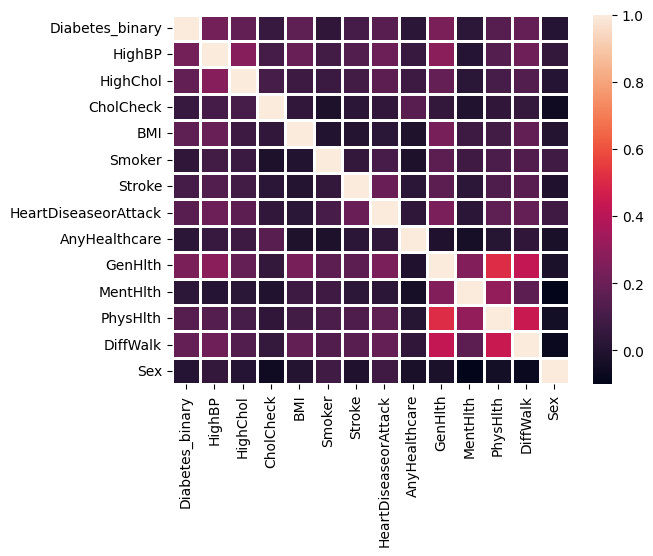

In [23]:
#show feature effect on target
sns.heatmap(df.corr(),linewidth=0.9 )

## Data ratio

<Axes: xlabel='Diabetes_binary', ylabel='count'>

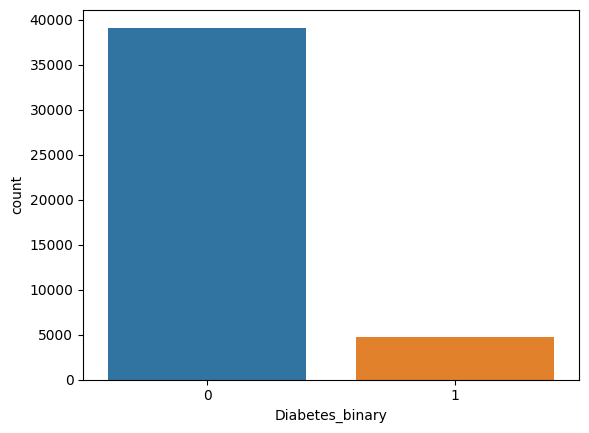

In [24]:
sns.countplot(x="Diabetes_binary",data=df)

<!-- Before marge
Not_Diabetes: 84.6%
Diabetes: 15.3%


After Marge
Not_Diabetes: 80%
Diabetes: 15.3% -->

In [27]:
# Binning

def BMI_Descrabtion (BMI):
    # Example mapping: Group common crime types into broader categories
    if BMI < 18.5 :
        return 'Underweight'
    elif BMI >= 18.5 and BMI <= 24.9:
        return 'Normal weight'
    elif BMI >= 25 and BMI <= 29.9 :
        return 'Overweight'
    elif BMI >= 30 and BMI <= 34.9 :
        return 'Obesity Class 1'
    elif BMI >= 35 and BMI <= 39.9 :
        return 'Obesity Class 2'
    else :
        return 'Obesity Class 3'
df['BMI Category'] = df['BMI'].apply(BMI_Descrabtion)

In [52]:
# convert column object datatype to int
df['BMI Category'].replace("Underweight" , 0, inplace = True)
df['BMI Category'].replace("Normal weight" , 1, inplace = True)
df['BMI Category'].replace("Overweight" , 2, inplace = True)
df['BMI Category'].replace("Obesity Class 1" , 3, inplace = True)
df['BMI Category'].replace("Obesity Class 2" , 4, inplace = True)
df['BMI Category'].replace("Obesity Class 3" , 5, inplace = True)


<!-- # EDA -->
<h1 align=center  style=background-color:DodgerBlue> Exploratory Data Analysis</h1>

<Axes: ylabel='Sex'>

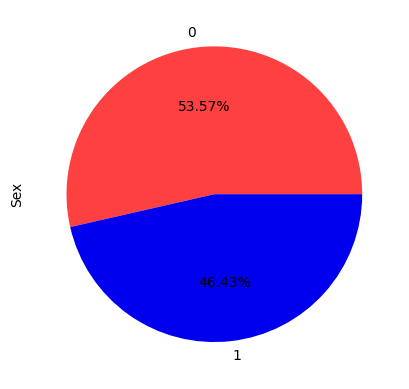

In [29]:
# SEX
round(df['Sex'].value_counts()/df.shape[0]*100,2).plot.pie(autopct = "%1.2f%%" , colors = ["#FF4040" , "#0000EE"] )

In [53]:
# BMI
px.pie(values=df['BMI Category'].value_counts(),names =df['BMI Category'].value_counts().index).update_layout(title='BMI Category')


In [45]:
# HightBP
plt.figure(figsize=(20, 10))
fig = px.histogram(data_frame=df, x="HighBP", title="Distribution of HighBP")
fig.show()

<Figure size 2000x1000 with 0 Axes>

In [46]:
# Stroke
plt.figure(figsize=(20, 10))
fig = px.histogram(data_frame=df, x="Stroke", title="Distribution of Stroke")
fig.show()

<Figure size 2000x1000 with 0 Axes>

In [47]:
# CholCheck
plt.figure(figsize=(20, 10))
fig = px.histogram(data_frame=df, x="CholCheck", title="Distribution of CholCheck")
fig.show()


<Figure size 2000x1000 with 0 Axes>

<!-- # Model -->
<h1 align=center  style=background-color:DodgerBlue> Modeling</h1>

In [54]:
# Split Data
x=df.iloc [:,1:]
y=df[["Diabetes_binary"]]

In [55]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [89]:
# standerscaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

# LR Model

In [90]:
# Train model
LR=LogisticRegression()
LR.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression()

In [95]:
# #Feature selection
# FeatureSelection= SelectFromModel(estimator=LR) # make sure that thismodel is well-defined
# FeatureSelection.fit(X_train,Y_train)
# FeatureSelection.get_support()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



array([ True,  True,  True, False, False, False, False, False,  True,
       False, False, False, False,  True])

## KNN Model

In [60]:
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



KNeighborsClassifier(n_neighbors=10)

## Decision Tree Model

In [61]:
dt=DecisionTreeClassifier(max_depth=5,max_features=7)
dt.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5, max_features=7)

In [97]:
# #Feature selection
# FeatureSelection= SelectFromModel(estimator=dt) # make sure that thismodel is well-defined
# FeatureSelection.fit(X_train,Y_train)
# FeatureSelection.get_support()

array([ True, False, False, False, False, False, False, False,  True,
       False, False, False, False, False])

## SVC Model

In [62]:
# svc=SVC(kernel='linear',C=1)

In [63]:
# svc.fit(x,y)

In [64]:
# feedback model(accurcy)
# print(classification_report(Y_test, y_pred_svc))

## XGBoost Model

In [65]:
!pip install xgboost

In [66]:
xgb=XGBClassifier( max_depth=4, n_estimators=6, learning_rate=0.4)

In [67]:
# # Gridsearch
# from sklearn.model_selection import GridSearchCV
# parameter={"n_estimators":np.arange(10,15),"max_depth":np.arange(1,10)}
# GS=GridSearchCV(XGBClassifier(),parameter)
# GS.fit(x,y)

In [68]:
xgb.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=6, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

## RandomForect Model

In [69]:
# Randomforect
rf = RandomForestClassifier(n_estimators= 18 , max_depth= 5 , max_features= 7)
rf.fit(X_train,Y_train)

<ipython-input-69-ce3d4c2589bb>:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier(max_depth=5, max_features=7, n_estimators=18)

In [70]:
# AUC XGB
# from sklearn.metrics import plot_roc_curve
# plot_roc_curve(xgb,X_test,Y_test)

# Voting

In [71]:
# clf1=LogisticRegression()
# clf2=XGBClassifier(missing=10 , max_depth=4,  n_estimators=6,learning_rate=0.4)
# clf3= DecisionTreeClassifier(    max_depth= 3 , max_features= 4)
# clf4=KNeighborsClassifier(n_neighbors=10)
# clf5=RandomForestClassifier(n_estimators= 5 , max_depth= 3 , max_features= 3)

In [72]:
# v_clf=VotingClassifier(estimators=[('LR',clf1),('xgb',clf2),('DT',clf3),('knn',clf4),('rf',clf5)],voting ="hard")

In [73]:
# v_clf.fit(X_train , Y_train)
# print (v_clf.score(X_train , Y_train))
# print (v_clf.score(X_test, Y_test))

In [74]:
# y_pred_vot=v_clf.predict(X_test)

<!-- # Report -->
<h1 align=center  style=background-color:DodgerBlue> Report </h1>

### LR

[[7741   78]
 [ 876   65]]


<Axes: >

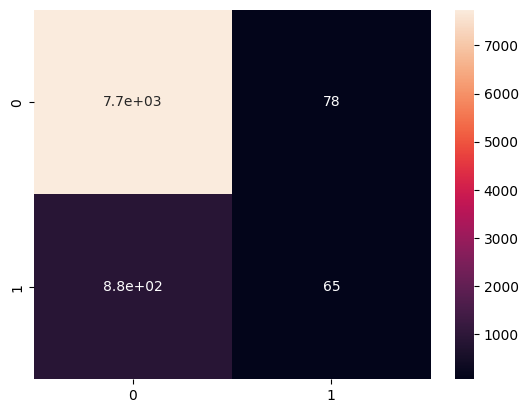

In [91]:
# Y_prediction
y_pred=LR.predict(X_test)
CM=confusion_matrix(Y_test, y_pred)
print(CM)
sns.heatmap(CM,annot=True)

In [76]:
# feedback LR model
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7819
           1       0.45      0.07      0.12       941

    accuracy                           0.89      8760
   macro avg       0.68      0.53      0.53      8760
weighted avg       0.85      0.89      0.85      8760



### KNN

In [77]:
y_pred_knn=knn.predict(X_test)
print (classification_report(Y_test , y_pred_knn))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7819
           1       0.49      0.12      0.19       941

    accuracy                           0.89      8760
   macro avg       0.70      0.55      0.57      8760
weighted avg       0.86      0.89      0.86      8760



### DT

In [78]:
y_pred_dt=dt.predict(X_test)
print (classification_report(Y_test , y_pred_dt))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7819
           1       0.48      0.09      0.16       941

    accuracy                           0.89      8760
   macro avg       0.69      0.54      0.55      8760
weighted avg       0.86      0.89      0.86      8760



### SVC

In [79]:
# y_pred_svc=svc.predict(X_test)
# print(classification_report(Y_test , y_pred_svc))


### XGB

In [80]:
y_pred_xgb=xgb.predict(X_test)
print (classification_report(Y_test , y_pred_xgb))


              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7819
           1       0.00      0.00      0.00       941

    accuracy                           0.89      8760
   macro avg       0.45      0.50      0.47      8760
weighted avg       0.80      0.89      0.84      8760



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



### RF

In [81]:
y_pred_rf=rf.predict(X_test)
print (classification_report(Y_test , y_pred_rf))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7819
           1       0.71      0.01      0.01       941

    accuracy                           0.89      8760
   macro avg       0.80      0.50      0.48      8760
weighted avg       0.87      0.89      0.84      8760



# Cross Validation

### LR

In [82]:
#cross validation
from sklearn.model_selection import KFold , cross_val_score
K_fold = KFold(n_splits= 3 , shuffle  = True ,random_state= 42)
scoring = "accuracy"
score = cross_val_score(LR ,X_train, Y_train, cv = K_fold , scoring= scoring)
print (score)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[0.89785084 0.89125781 0.89271342]


### RF

In [83]:
#cross validation
from sklearn.model_selection import KFold , cross_val_score
K_fold = KFold(n_splits= 3 , shuffle  = True ,random_state= 42)
scoring = "accuracy"
score = cross_val_score(rf ,X_train, Y_train, cv = K_fold , scoring= scoring)
print (score)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[0.89742272 0.89023033 0.8919428 ]


### xgb

In [84]:
#cross validation
from sklearn.model_selection import KFold , cross_val_score
K_fold = KFold(n_splits= 3 , shuffle  = True ,random_state= 42)
scoring = "accuracy"
score = cross_val_score(xgb ,X_train, Y_train, cv = K_fold , scoring= scoring)
print (score)

[0.89853583 0.89185718 0.89219967]


### DT

In [85]:
#cross validation
from sklearn.model_selection import KFold , cross_val_score
K_fold = KFold(n_splits= 3 , shuffle  = True ,random_state= 42)
scoring = "accuracy"
score = cross_val_score(dt ,X_train, Y_train, cv = K_fold , scoring= scoring)
print (score)

[0.8973371  0.89031595 0.89117219]


###KNN

In [86]:
#cross validation
from sklearn.model_selection import KFold , cross_val_score
K_fold = KFold(n_splits= 3 , shuffle  = True ,random_state= 42)
scoring = "accuracy"
score = cross_val_score(knn ,X_train, Y_train, cv = K_fold , scoring= scoring)
print (score)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[0.8958815  0.88997346 0.89219967]


<hr>

<!-- # Evaluation -->
<h1 align=center  style=background-color:DodgerBlue> Evaluation</h1>

In [87]:
evaluation=pd.DataFrame({
    "Model":['LR',"RF","XGB","DT","knn"],"Accurcy":[accuracy_score(Y_test, y_pred),accuracy_score(Y_test , y_pred_rf),accuracy_score(Y_test , y_pred_xgb),accuracy_score(Y_test , y_pred_dt),accuracy_score(Y_test, y_pred_knn)]
})
evaluation

,Model,Accurcy
0,LR,0.891096
1,RF,0.892922
2,XGB,0.892580
3,DT,0.891895
4,knn,0.891895


<hr>

<!-- # Test -->
<h1 align=center  style=background-color:DodgerBlue> Test</h1>

In [88]:
display(x.head(10))
print("************************************************************************")
display(y.head(10))

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,AnyHealthcare,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,BMI Category
0,0,1,1,15,1,0,0,1,5,10,20,0,0,0
1,1,0,1,28,0,0,1,1,2,0,0,0,0,2
2,1,1,1,33,0,0,0,1,2,10,0,0,0,3
3,0,1,1,29,0,1,1,1,5,0,30,1,1,2
4,0,0,1,24,1,0,0,1,3,0,0,1,1,1
5,1,0,1,40,1,0,0,1,3,5,25,1,0,5
6,1,1,1,27,1,0,0,1,4,25,0,0,0,2
7,0,0,1,24,0,0,1,1,4,0,0,0,1,1
8,1,1,1,30,0,0,0,1,2,0,0,0,0,3
9,1,1,1,36,1,0,0,1,4,0,0,0,1,4


************************************************************************


,Diabetes_binary
0,0
1,1
2,1
3,1
4,0
5,0
6,0
7,1
8,0
9,0


In [94]:
human_1 = [0	,1,	1,	15,	1,	0,	0,	1,	5,	10,	20,	0,	0,0] # 0
print (LR.predict([human_1]))


human_2 = [0,	0,	1,	24,	0,	0	,1	,1	,4	,0	,0	,0,	1,1] # 7
print (LR.predict([human_2]))

human_3 = [0	,1,	1,	29,	0,	1	,1	,1,	5,	0,	30,	1,	1,2] # 3
print (LR.predict([human_3]))


[0]
[1]
[1]
